<h1><center>Adidas EDA</center></h1>


## Table of Contents
* [Introduction](#intro)
* [1. Get started](#section-one)
* [2. Retailers and Region](#section-two)
    - [2.1 Pie chart](#subsection-one)
    - [2.2 Macro time-series](#subsection-two)
    - [2.3 Seasonality](#subsection-three)
* [3. Product types](#section-three)
    - [3.1 Product type viz](#subsection-3one)
    - [3.2 Product type chart](#subsection-3two)
* [4. Sales Method](#section-four)
    - [4.1 Sales method total](#subsection-4one)
    - [4.2 Sales method by store](#subsection-4two)
* [Conclusion](#conclusion)
​


<a id="intro"></a>

<h1>Introduction</h1> 
**The purpose of this analysis is to do a first pass through of the data for a future drill down, and dashboard using BI tools. This is the first stage of the data analysis. In the future this notebook may contain some feature engineering and ML projects in addition to this EDA. I will be trying to answer the following:**

*What Retailer and Region account for the most sales?*

*Are there any macro trends in our sales?*

*Is there a seasonality component to Adidas sales?*

*What are the top selling products for Adidas?* 

*What is the top sales method?*



**tldr:** 

 West gear and Footlocker are the top retailers for sales at 27% and 24.5% respectively. <br>
 
 Their seemed to be a macro trend of peak sales around July 2021 and then dipped down heading into the later portion of the year. This trend seems to   mirrors the macro econonmy to some extent.<br>
 
 Their is a clear seasonality trend to the sales data.<br>
 
 The data peaks at July, then drops, then spikes at December. My working hypothesis for this is the back to school and Christmas seasons cause these     surges, but more analysis would have to be  done to verify that.<br>
 
 The top selling products are  Men's Street Footwear, Women's Apparel, and Men's Athletic Footwear. These 3 categories account for 60% of sales.<br>
 
 The top earning Sales method is In-store sales, with West Gate being a large contributing factor to In-store sales volume.<br>

***

<a id="section-one"></a>
<h2>1. Getting Started</h2>
First, I will load the data set using Pandas, and then wrangle and clean the data into a workable format. 

In [1]:
import numpy as np #importing for linear algegbra
import pandas as pd #for working in panel data to wrangle data as well as import
import seaborn as sns #for visualizing data
from matplotlib import pyplot as plt #for visualizing data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx


In [2]:
# Load the data from an Excel file using pandas
data_import = pd.read_excel("/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx")

# Print the first few rows of the data
data_import.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [3]:
# Set the column names to be the fourth row of the data_import DataFrame
# Select all rows starting from the fifth row, and all columns starting from the second column
# Then, reset the index and drop the original index
data_import.columns = data_import.iloc[3]
df = data_import.iloc[4:, 1:].reset_index(drop=True)

# Get the shape of the data_import
data_import.shape

# Set the index name of the df DataFrame to be 'index'
df.index.name = 'index'

# Set the maximum number of columns to display to be 17
pd.set_option('display.max_columns', 17)

# Create a new column for dates from 'Invoice Date'
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day
df['date'] = pd.to_datetime(df['Invoice Date'])

# Convert columns to useful data types
df['Price per Unit'] = df['Price per Unit'].astype(int)
df['Units Sold'] = df['Units Sold'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)
df['Operating Margin'] = df['Operating Margin'].astype(float)
df['Total Sales'] = df['Total Sales'].astype(int)

# Display the data type of each column in the df DataFrame
df.dtypes

3
Retailer                    object
Retailer ID                 object
Invoice Date                object
Region                      object
State                       object
City                        object
Product                     object
Price per Unit               int64
Units Sold                   int64
Total Sales                  int64
Operating Profit             int64
Operating Margin           float64
Sales Method                object
year                         int64
month                        int64
day                          int64
date                datetime64[ns]
dtype: object

In [4]:
df.describe()

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.182214,256.930037,93273.403089,34424.911692,0.422991,2020.865050,6.458126,14.696310
std,14.698080,214.252030,141915.997157,54193.216234,0.097197,0.341688,3.454799,7.348019
min,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000,1.000000
25%,35.000000,106.000000,4254.500000,1921.000000,0.350000,2021.000000,3.000000,9.000000
50%,45.000000,176.000000,9576.000000,4371.000000,0.410000,2021.000000,6.000000,15.000000
75%,55.000000,350.000000,150000.000000,52062.000000,0.490000,2021.000000,9.000000,21.000000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000,31.000000


In [5]:
df.isna().sum()


3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
year                0
month               0
day                 0
date                0
dtype: int64

***

<a id="section-two"></a>
<h2>2. Retailers and Regions</h2>

<a id="subsection-one"></a>
<h3>2.1 Retailer and Region pie chart</h3>

Lets start the visualizations with two pie charts looking at the total sales broken down by retailer and regions respectively.

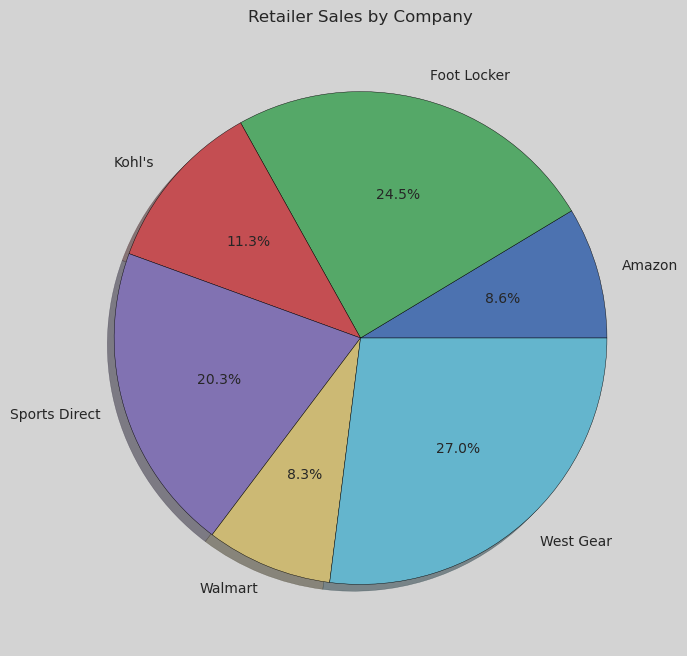

In [6]:
# pie chart of sales by company
retailer_sales = df.groupby(['Retailer'])['Total Sales'].sum()
retailer_sales
t_sales = retailer_sales.sum()
m_share = retailer_sales/ t_sales
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
f.set_facecolor('lightgrey')
plt.style.use("seaborn")
plt.title("Retailer Sales by Company")
plt.pie(m_share, labels=retailer_sales.index, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', shadow=True)
plt.show()

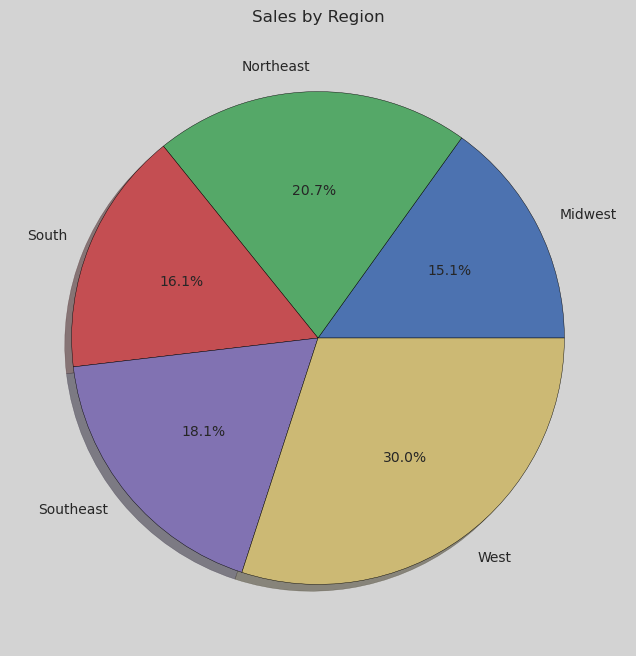

In [7]:
#same plot for region
region_sales = df.groupby(['Region'])['Total Sales'].sum()
region_sales
tr_sales = region_sales.sum()
mr_share = region_sales/ tr_sales
p = plt.figure()
p.set_figwidth(10)
p.set_figheight(8)
p.set_facecolor('lightgrey')
plt.style.use("seaborn")
plt.title("Sales by Region")
plt.pie(mr_share, labels=region_sales.index, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', shadow=True)
plt.show()

***

<a id="subsection-two"></a>
<h3>2.2 Macro trends</h3>

Now, let's look at the sales data by retailer over the dates we have access to, in order to spot macro trends in our sales data

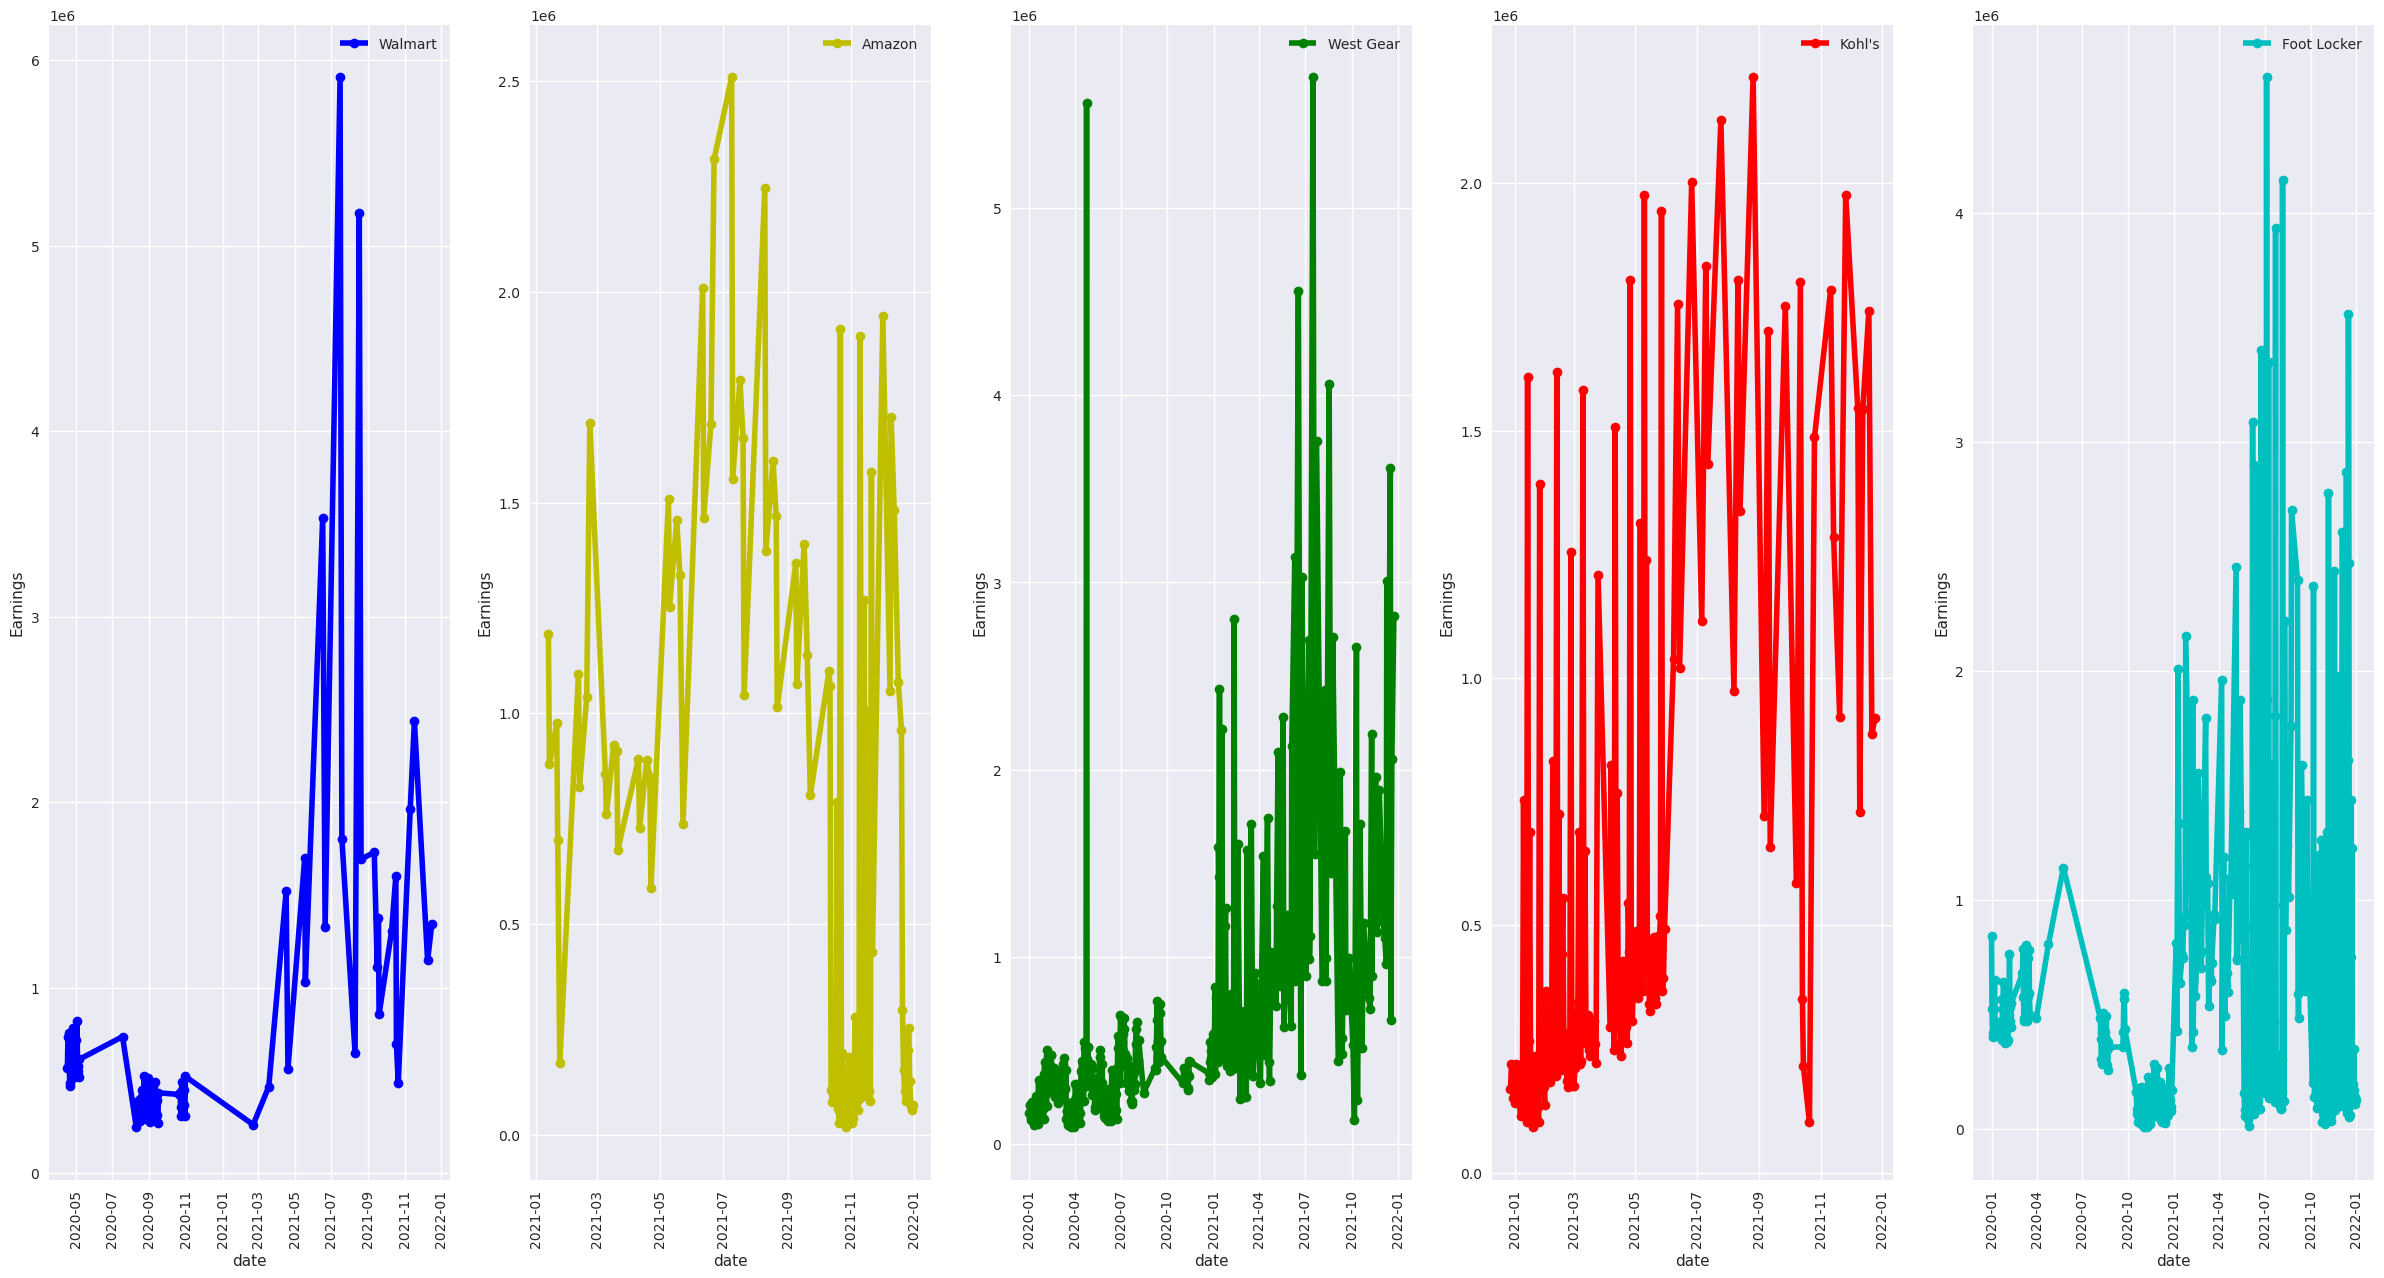

In [8]:
#looking at earning over time for each retailer to spot macro trends
df_group = df.groupby(['Retailer', 'date'])['Total Sales'].sum()
df_group = df_group.reset_index()

retailers = ['Walmart', 'Amazon', 'West Gear', "Kohl's", 'Foot Locker']
colors = ['b', 'y', 'g', 'r', 'c']

fig, axes = plt.subplots(nrows=1, ncols=len(retailers))
plt.gcf().set_size_inches(30, 15)
plt.style.use('fivethirtyeight')

for i, retailer in enumerate(retailers):
    retailer_data = df_group[df_group['Retailer'] == retailer]
    x = retailer_data['date']
    y = retailer_data['Total Sales']
    ax = axes[i]
    ax.plot_date(x, y, linestyle='solid', label=retailer, c=colors[i])
    ax.set_xlabel('date')
    ax.set_ylabel('Earnings')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

plt.show()


***

<a id="subsection-three"></a>
<h3>2.3 Seasonality</h3>

We will start with grouping by retailer and month to spot any trends

In [9]:
#examaning groupby frame for montly sales chart below
df_group = df.groupby(['Retailer', 'month'])['Total Sales'].sum()
df_group = df_group.reset_index()
df_group


,Retailer,month,Total Sales
0,Amazon,1,3913614
1,Amazon,2,4645628
2,Amazon,3,4128512
3,Amazon,4,3942984
4,Amazon,5,6287069
...,...,...,...
66,West Gear,8,16204318
67,West Gear,9,14082406
68,West Gear,10,7574248
69,West Gear,11,16683779


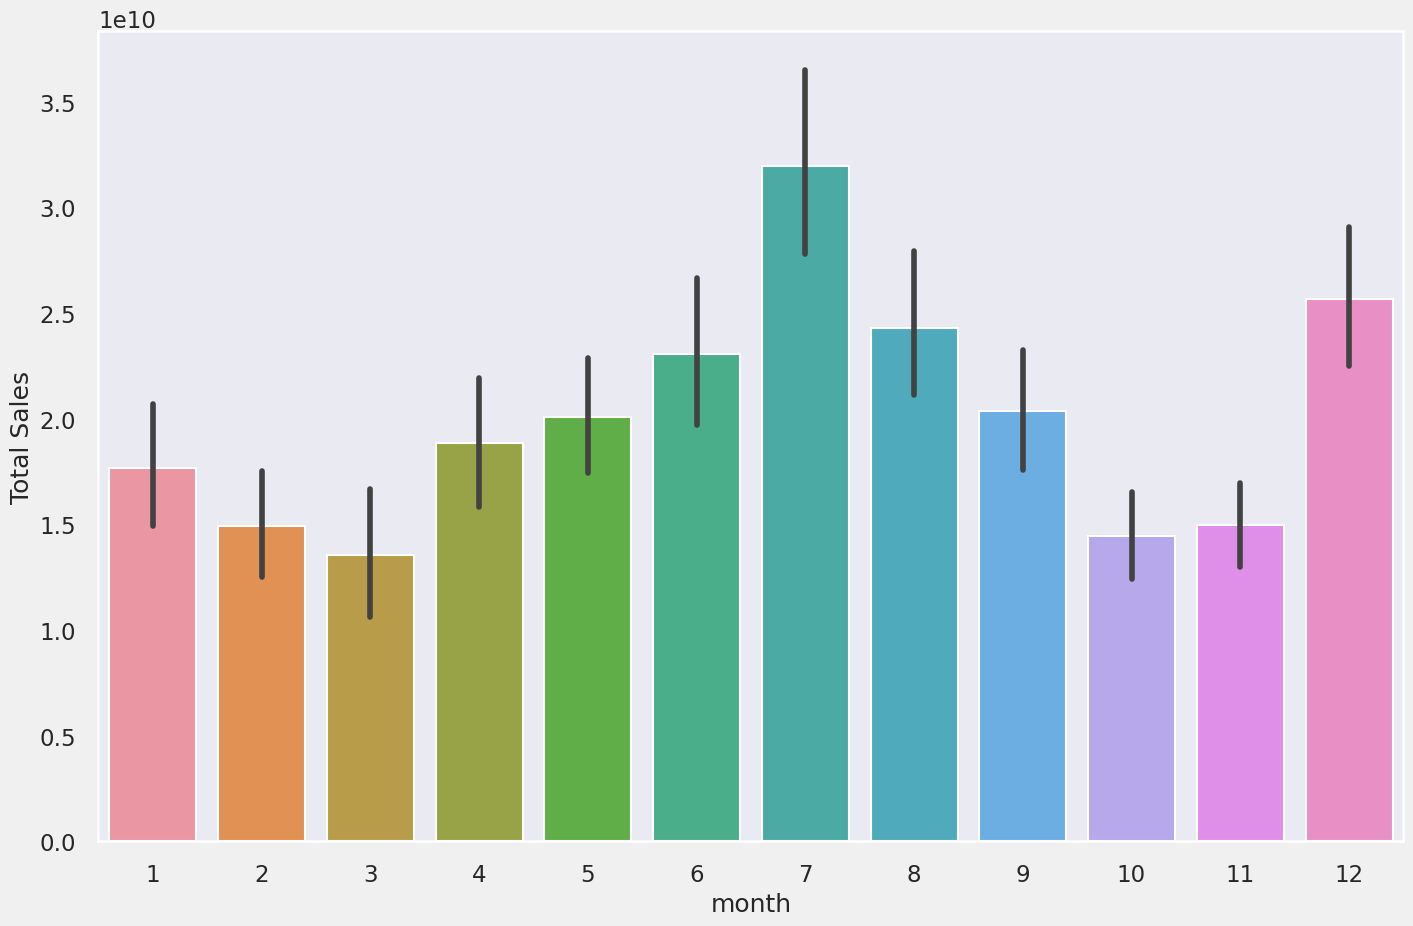

In [10]:
#seasonality of sales
plt.figure(figsize=(15,10))
sns.set_style('dark')
sns.set_context('talk')
sns.barplot(x='month', y='Total Sales', data=df, dodge=True, estimator=np.var)
plt.show()


Now we can clearly see that sales star to increast as we approach July, and then start to wane before hitting our secondary peak at december. More investigation would need to be done as to why, but a prelimary guess would be back to school season being the primary factor driving July sales, and Christmas driving the December spike. 

Continuing forward, Let's see if this seasonality is true for all retailers or if only some retailers expirienced this pattern.

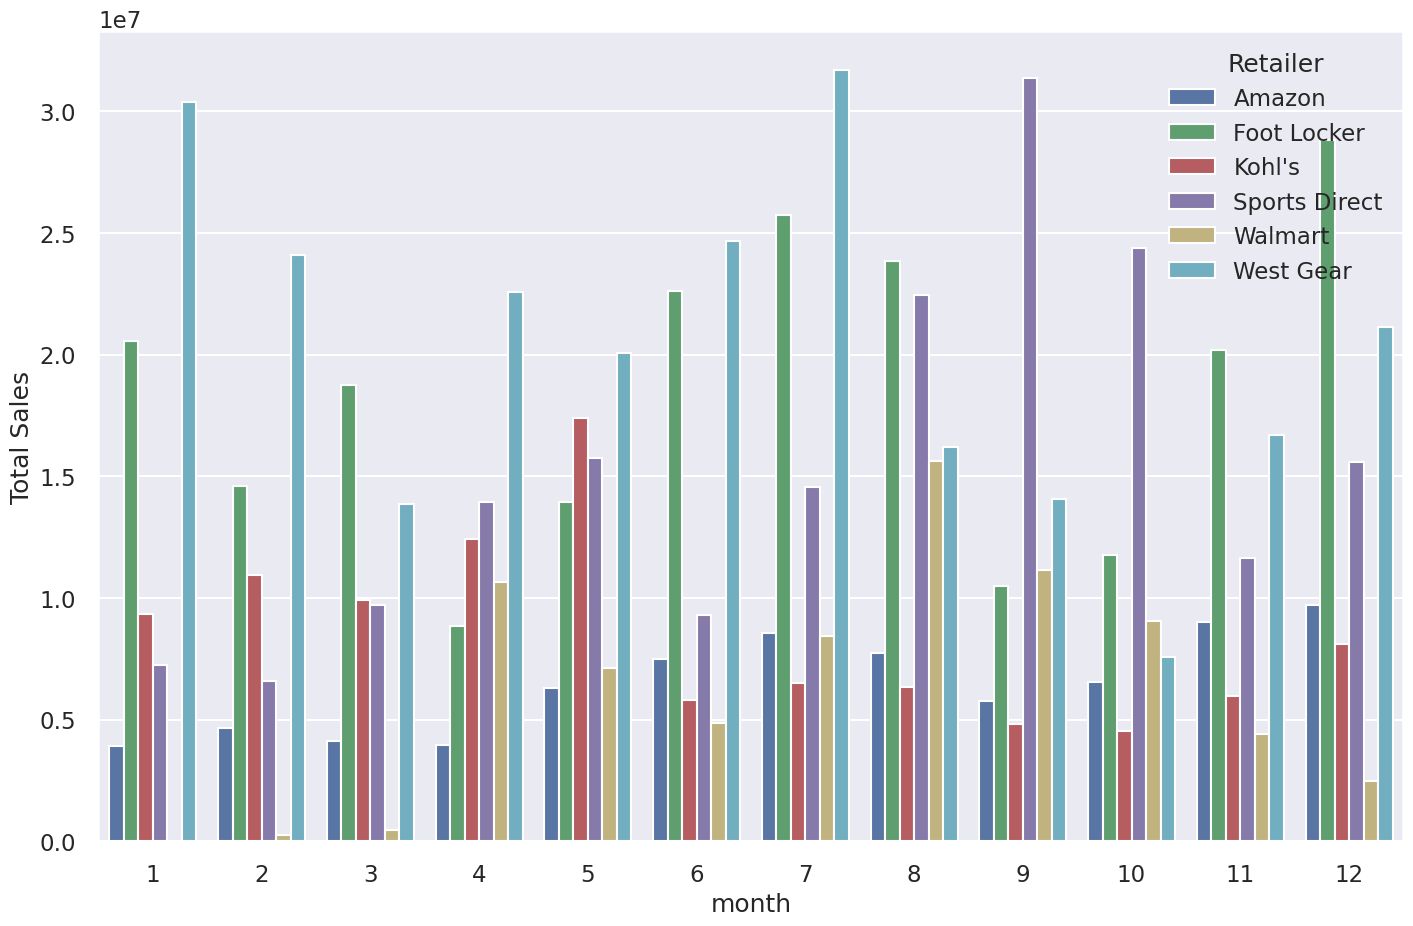

In [11]:
#testing seasononlity of sales being independently true for each retailer
plt.figure(figsize=(15,10))
plt.style.use("seaborn")
sns.set_context('talk')
sns.barplot(x='month', y='Total Sales', data=df_group, hue='Retailer', dodge=True)
plt.show()

It appears that the pattern seems to be true for all retailers, with just one exception of Walmart during December. 

*It is important to note, that the distrubtion of the data across dates is not the same across all retailers. Some companies might have 2021 sales and not 2020 sales for some months. This would skew the trends we are observing. Using the avg sales in a month would give a better picture, but since we are observing the trend still there is not much need to do deeper analysis*

***

<a id="section-three"></a>
<h2>3. Product Types</h2>

<a id="subsection-3one"></a>
<h3>3.1 Product types visualized</h3>

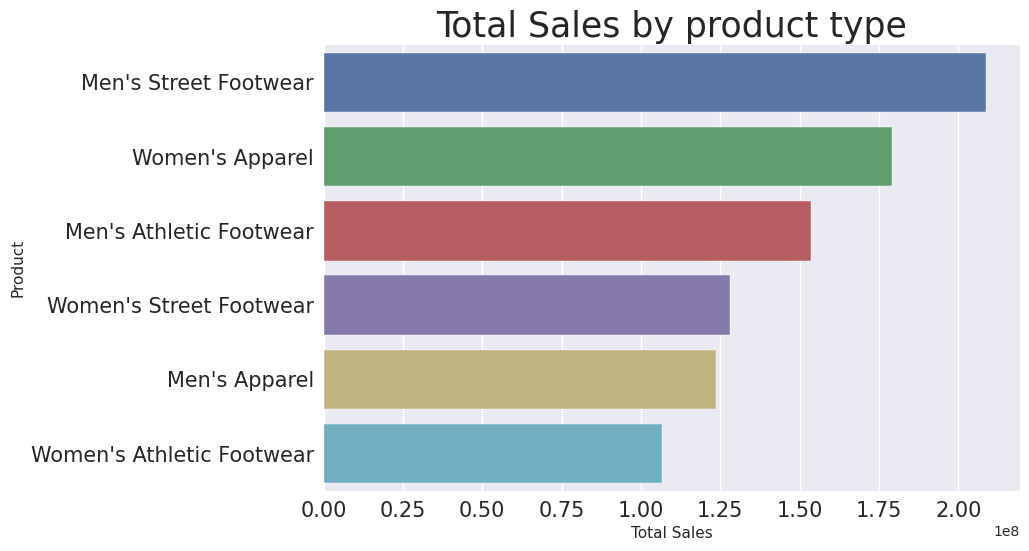

In [12]:
#visualizing the total sales by product groups
prod_group = df.groupby(['Product']).sum()
prod_group = prod_group.sort_values(by='Total Sales', ascending=False)
plt.style.use("seaborn")
b = sns.barplot(x = 'Total Sales', y = prod_group.index, data=prod_group)
b.axes.set_title("Total Sales by product type",fontsize=25)
b.tick_params(labelsize=15)
plt.show()

**Diving into product types we find mens Street Footwear, Women's Apparel, and Men's Athletic Footwear are the top 3 categories.** 

More analysis could be done into how these product types break down at the retailer or region levels. In the future I may do a deeper drill down into this area. 

***

<a id="subsection-3two"></a>
<h3>3.2 Product types charted</h3>

In [13]:
#Finding percetages of sales and cumulitave sums, over 60 percent of sales come from 3 categories
prod_group['Percentage'] = prod_group['Total Sales'] / prod_group['Total Sales'].sum()
prod_group = prod_group.sort_values(by='Percentage' ,ascending=False)
prod_group['cumsum_profit'] = prod_group['Percentage'].cumsum()
prod_group

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day,Percentage,cumsum_profit
Product,,,,,,,,,,
Men's Street Footwear,71144,593320,208826167,82801715,718.27,3253591,10391,23688,0.232054,0.232054
Women's Apparel,82886,433827,179038772,68650450,709.64,3249549,10380,23680,0.198954,0.431008
Men's Athletic Footwear,70478,435526,153673673,51846374,648.35,3253594,10377,23511,0.170767,0.601775
Women's Street Footwear,64710,392269,128002797,45095297,659.60,3249552,10378,23573,0.142241,0.744016
Men's Apparel,80714,306683,123728529,44762447,663.64,3245510,10393,23609,0.137491,0.881507
Women's Athletic Footwear,65986,317236,106631855,38975265,681.52,3245510,10389,23729,0.118493,1.000000


**Here we can see in the cumsum_profit column the cumulitive sum of the categories. Our top 3 categories account for 60% of our sales**

***

<a id="section-four"></a>
<h2>4. Sales Methods</h2>

<a id="subsection-4one"></a>
<h3>4.1 Sales method visualized</h3>

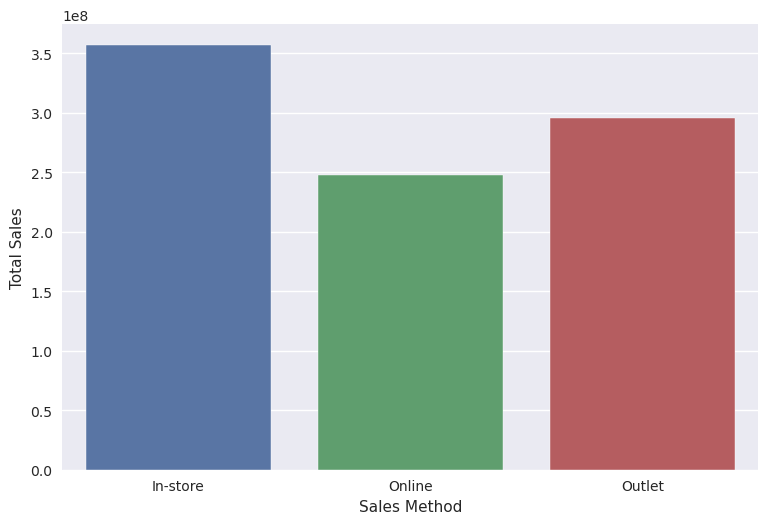

In [14]:
#comparing Sales method with bar chart showing total sales
method_group = df.groupby(['Sales Method']).sum()
plt.style.use("seaborn")
sns.barplot(x= method_group.index, y='Total Sales', data=method_group)
plt.show()

**It is clear that In-store is our largest method of sales. Interestingly, online sales is the lowest method of sales in our dataset.**

***

<a id="subsection-4two"></a>
<h3>4.2 Sales method by store</h3>


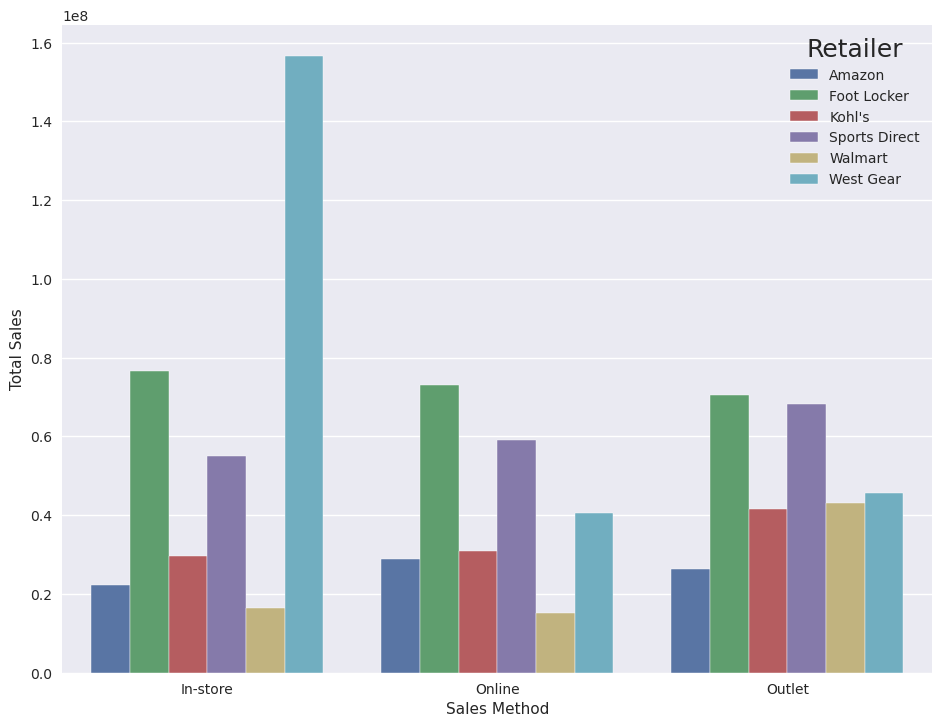

In [15]:
method_group = df.groupby(['Sales Method', 'Retailer'])
mdf = method_group['Total Sales'].sum()
mdf = mdf.reset_index()
plt.figure(figsize=(10,8))
plt.style.use("seaborn-darkgrid")
sns.barplot(x='Sales Method', y='Total Sales', data=mdf, hue="Retailer")
plt.show()

**Here we can see the primary driver of our In-Store sales being the high is West Gear's In-store sales**

***

<a id="conclusion"></a>
<h2>5. Conclusion</h2>

According to sales data, West Gear and Footlocker are the top retailers, accounting for 27% and 24.5% of sales, respectively. The data indicates a macro trend of peak sales around July 2021, followed by a dip towards the later portion of the year, which seems to mirror the macro economy to some extent. Additionally, there is a clear seasonality trend to the sales data. The data builds over the beginning of the year and peaks in July, drops, and then spikes at December. The working hypothesis for this trend is that the back-to-school and Christmas seasons cause these surges, but more analysis would need to be done to verify this. The top selling products are Men's Street Footwear, Women's Apparel, and Men's Athletic Footwear, which together account for 60% of sales. In-store sales are the top earning sales method, with West Gate being a significant contributor to in-store sales volume. Overall, we were able to answer the questions we sought out to solve. This first pass through of the data was successful and has uncovered a few things that could be valuable to drill down more into. I would be interested in seeing why West Gate has such successful in-store sales. It could potentially increase the companies revenue by applying their success methods to other retailers. 